In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.roach.heterodyne

In [3]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne()

In [4]:
ri.set_fft_gain(4)

In [5]:
ri.set_lo(1000.)

In [6]:
ri.set_tone_freqs(np.array([945.1]),2**16)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([ 945.1015625])

In [7]:
ri.set_dac_atten(20)

In [8]:
d,addr = ri.get_data(2)

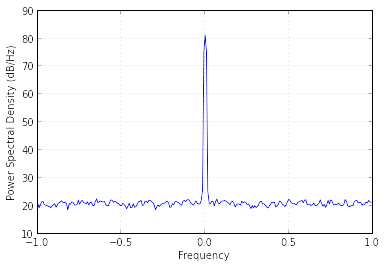

In [11]:
blah = psd(d[:,0])

In [12]:
import time

In [13]:
epoch = []
data = []

In [15]:
while True:
    epoch.append(time.time())
    d,addr = ri.get_data(2)
    data.append(d)
    print len(data),d.mean()
    time.sleep(60)
    

12 (1289.96-100.316j)
13 (1300.17-96.3796j)
14 (1314.1-88.9504j)
15 (1333.67-76.3162j)
16 (1362.68-54.1537j)
17 (1404.29-3.24305j)
18 (1443.57+119.553j)
19 (1280.92+350.019j)
20 (1028.26+78.7508j)
21 (1078.38-29.8864j)
22 (1111.93-64.429j)
23 (1132.92-79.9549j)
24 (1147.55-88.1753j)
25 (1157.74-93.5779j)
26 (1165.3-96.7427j)
27 (1171.5-99.4636j)
28 (1176.12-100.592j)
29 (1180.23-101.98j)
detected mcnt overflow None 7904788 0 2048 0 16 7904788
30 (1183.24-102.969j)
31 (1185.53-103.391j)
32 (1187.63-103.759j)
33 (1189.38-104.076j)
34 (1190.32-104.438j)
35 (1190.99-104.717j)
36 (1191.07-105.198j)
37 (1190.47-106.464j)
38 (1188.4-108.689j)
39 (1186.08-117.018j)
40 (1202.11-129.478j)
41 (1213.6-115.807j)
42 (1212.19-108.727j)
43 (1210.73-106.345j)
44 (1209.69-104.721j)
45 (1209.05-103.976j)
46 (1208.53-103.56j)
47 (1208.02-103.609j)
48 (1207.2-103.852j)
49 (1205.87-105.3j)
50 (1208.46-111.532j)
51 (1215.6-107.711j)
52 (1215.1-104.102j)
53 (1214.81-102.832j)
54 (1214.39-102.31j)
55 (1214.35-

KeyboardInterrupt: 

In [29]:
data2 = []
epoch2 = []

In [30]:
while True:
    epoch2.append(time.time())
    d,addr = ri.get_data(2)
    data2.append(d)
    print len(data2),d.mean()
    time.sleep(10)
    

1 (1186.39-102.233j)
2 (1186.79-102.176j)
3 (1187-102.366j)
4 (1187.47-102.342j)
5 (1187.38-102.247j)
6 (1187.85-101.943j)
7 (1188.1-102.408j)
8 (1188.33-101.957j)
9 (1188.54-102.11j)
10 (1189.11-102.177j)
11 (1189.04-102.331j)
12 (1189.3-102.199j)
13 (1189.05-102.419j)
14 (1189.47-102.182j)
15 (1189.55-102.663j)
16 (1189.89-102.562j)
17 (1189.87-102.701j)
18 (1190.01-103.182j)
19 (1189.92-102.87j)
20 (1190.17-103.186j)
21 (1189.98-103.541j)
22 (1189.98-102.939j)
23 (1190.37-103.407j)
24 (1190.32-103.815j)
25 (1190.44-103.496j)
26 (1190.37-104.037j)
27 (1190.1-103.912j)
28 (1189.87-104.065j)
29 (1189.96-104.104j)
30 (1190.11-104.4j)
31 (1189.8-104.649j)
32 (1189.48-104.759j)
33 (1189.29-105.081j)
34 (1189.19-105.587j)
35 (1189.07-105.454j)
36 (1188.62-106.028j)
37 (1187.99-106.71j)
38 (1187.86-107.344j)
39 (1187.4-107.77j)
40 (1186.58-108.849j)
41 (1186.1-110.205j)
42 (1185.8-111.473j)
43 (1185.4-113.193j)
44 (1185.5-115.348j)
45 (1185.64-117.788j)
46 (1186.39-120.77j)
47 (1188.3-123.9

KeyboardInterrupt: 

In [16]:
dmag = np.array([np.abs(d).mean() for d in data])
t = np.array(epoch)
t = t-t.min()

In [31]:
dmag2 = np.array([np.abs(d).mean() for d in data2])
t2 = np.array(epoch2)
t2 = t2-t2.min()

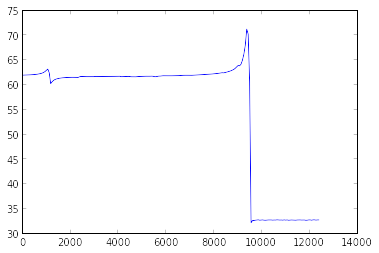

In [19]:
plot(t,20*np.log10(dmag))

In [33]:
import kid_readout.utils.hpd_temps
reload(kid_readout.utils.hpd_temps)

<module 'kid_readout.utils.hpd_temps' from '/home/gjones/readout/kid_readout/kid_readout/utils/hpd_temps.pyc'>

In [23]:
package_temperature,_,load_temperature,_blah = kid_readout.utils.hpd_temps.get_temperatures_at(np.array(epoch))

(1.45, 1.55)

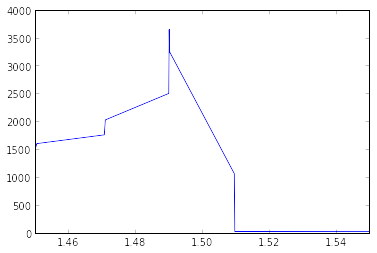

In [27]:
plot(package_temperature,dmag)
xlim(1.45,1.55)

In [34]:
package_temperature2,_,load_temperature,_blah = kid_readout.utils.hpd_temps.get_temperatures_at(np.array(epoch2))

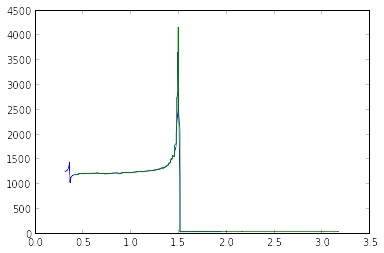

In [36]:
plot(package_temperature,dmag)
plot(package_temperature2,dmag2)
#xlim(1.45,1.55)

In [ ]:
np.savez('/data/detectors/2015-06-19-asu-nevins-tc-measure.npz',package_temperature=package_temperature,package_temperature2=package_temperature2,
        dmag = dmag, dmag2 = dmag2, freq=)